# **OBJECTIVE**
This notebook is focused on developing and improving data visualization skills using R and ggplot2. Through the Superstore dataset, we'll explore various chart types and visualization techniques to effectively communicate insights from data.

# **1. SETUP AND DATA LOADING**

In [1]:
# Loading required packages
library(ggplot2)
library(tidyverse)
library(lubridate)
library(dplyr)
library(scales)

# Importing dataset
df <- read_csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv")

# Define color palette for consistent visualizations
palette_color <- c("#f1dca7", "#ffcb69", "#d08c60", "#997b66", "#e07a5f", "#3d405b")

# Set default plot size for better visibility
options(repr.plot.width = 14, repr.plot.height = 8)
options(repr.plot.res = 300)

# Cleaning column names (converting to lowercase and replacing spaces)
col_names_original <- names(df)
cleaned_col_names <- tolower(gsub(" ", "_", x = col_names_original))
names(df) <- cleaned_col_names

# Display dataset structure
glimpse(df)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘scales’




The following object is masked from ‘package:purrr’:

    discard




The following object is masked from ‘package:readr’:

    col_factor




Rows: 9994 Columns: 21


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer ...
dbl  (5): Row ID, Sales, Quantity, Discount, Profit



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 9,994
Columns: 21
$ row_id         <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ order_id       <chr> "CA-2016-152156", "CA-2016-152156", "CA-2016-138688", "…
$ order_date     <chr> "11/8/2016", "11/8/2016", "6/12/2016", "10/11/2015", "1…
$ ship_date      <chr> "11/11/2016", "11/11/2016", "6/16/2016", "10/18/2015", …
$ ship_mode      <chr> "Second Class", "Second Class", "Second Class", "Standa…
$ customer_id    <chr> "CG-12520", "CG-12520", "DV-13045", "SO-20335", "SO-203…
$ customer_name  <chr> "Claire Gute", "Claire Gute", "Darrin Van Huff", "Sean …
$ segment        <chr> "Consumer", "Consumer", "Corporate", "Consumer", "Consu…
$ country        <chr> "United States", "United States", "United States", "Uni…
$ city           <chr> "Henderson", "Henderson", "Los Angeles", "Fort Lauderda…
$ state          <chr> "Kentucky", "Kentucky", "California", "Florida", "Flori…
$ postal_code    <chr> "42420", "42420", "90036", "33311", "33311", "90032", "…
$ region        

# **2. CATEGORY ANALYSIS**

## 2.1 Sales by Category

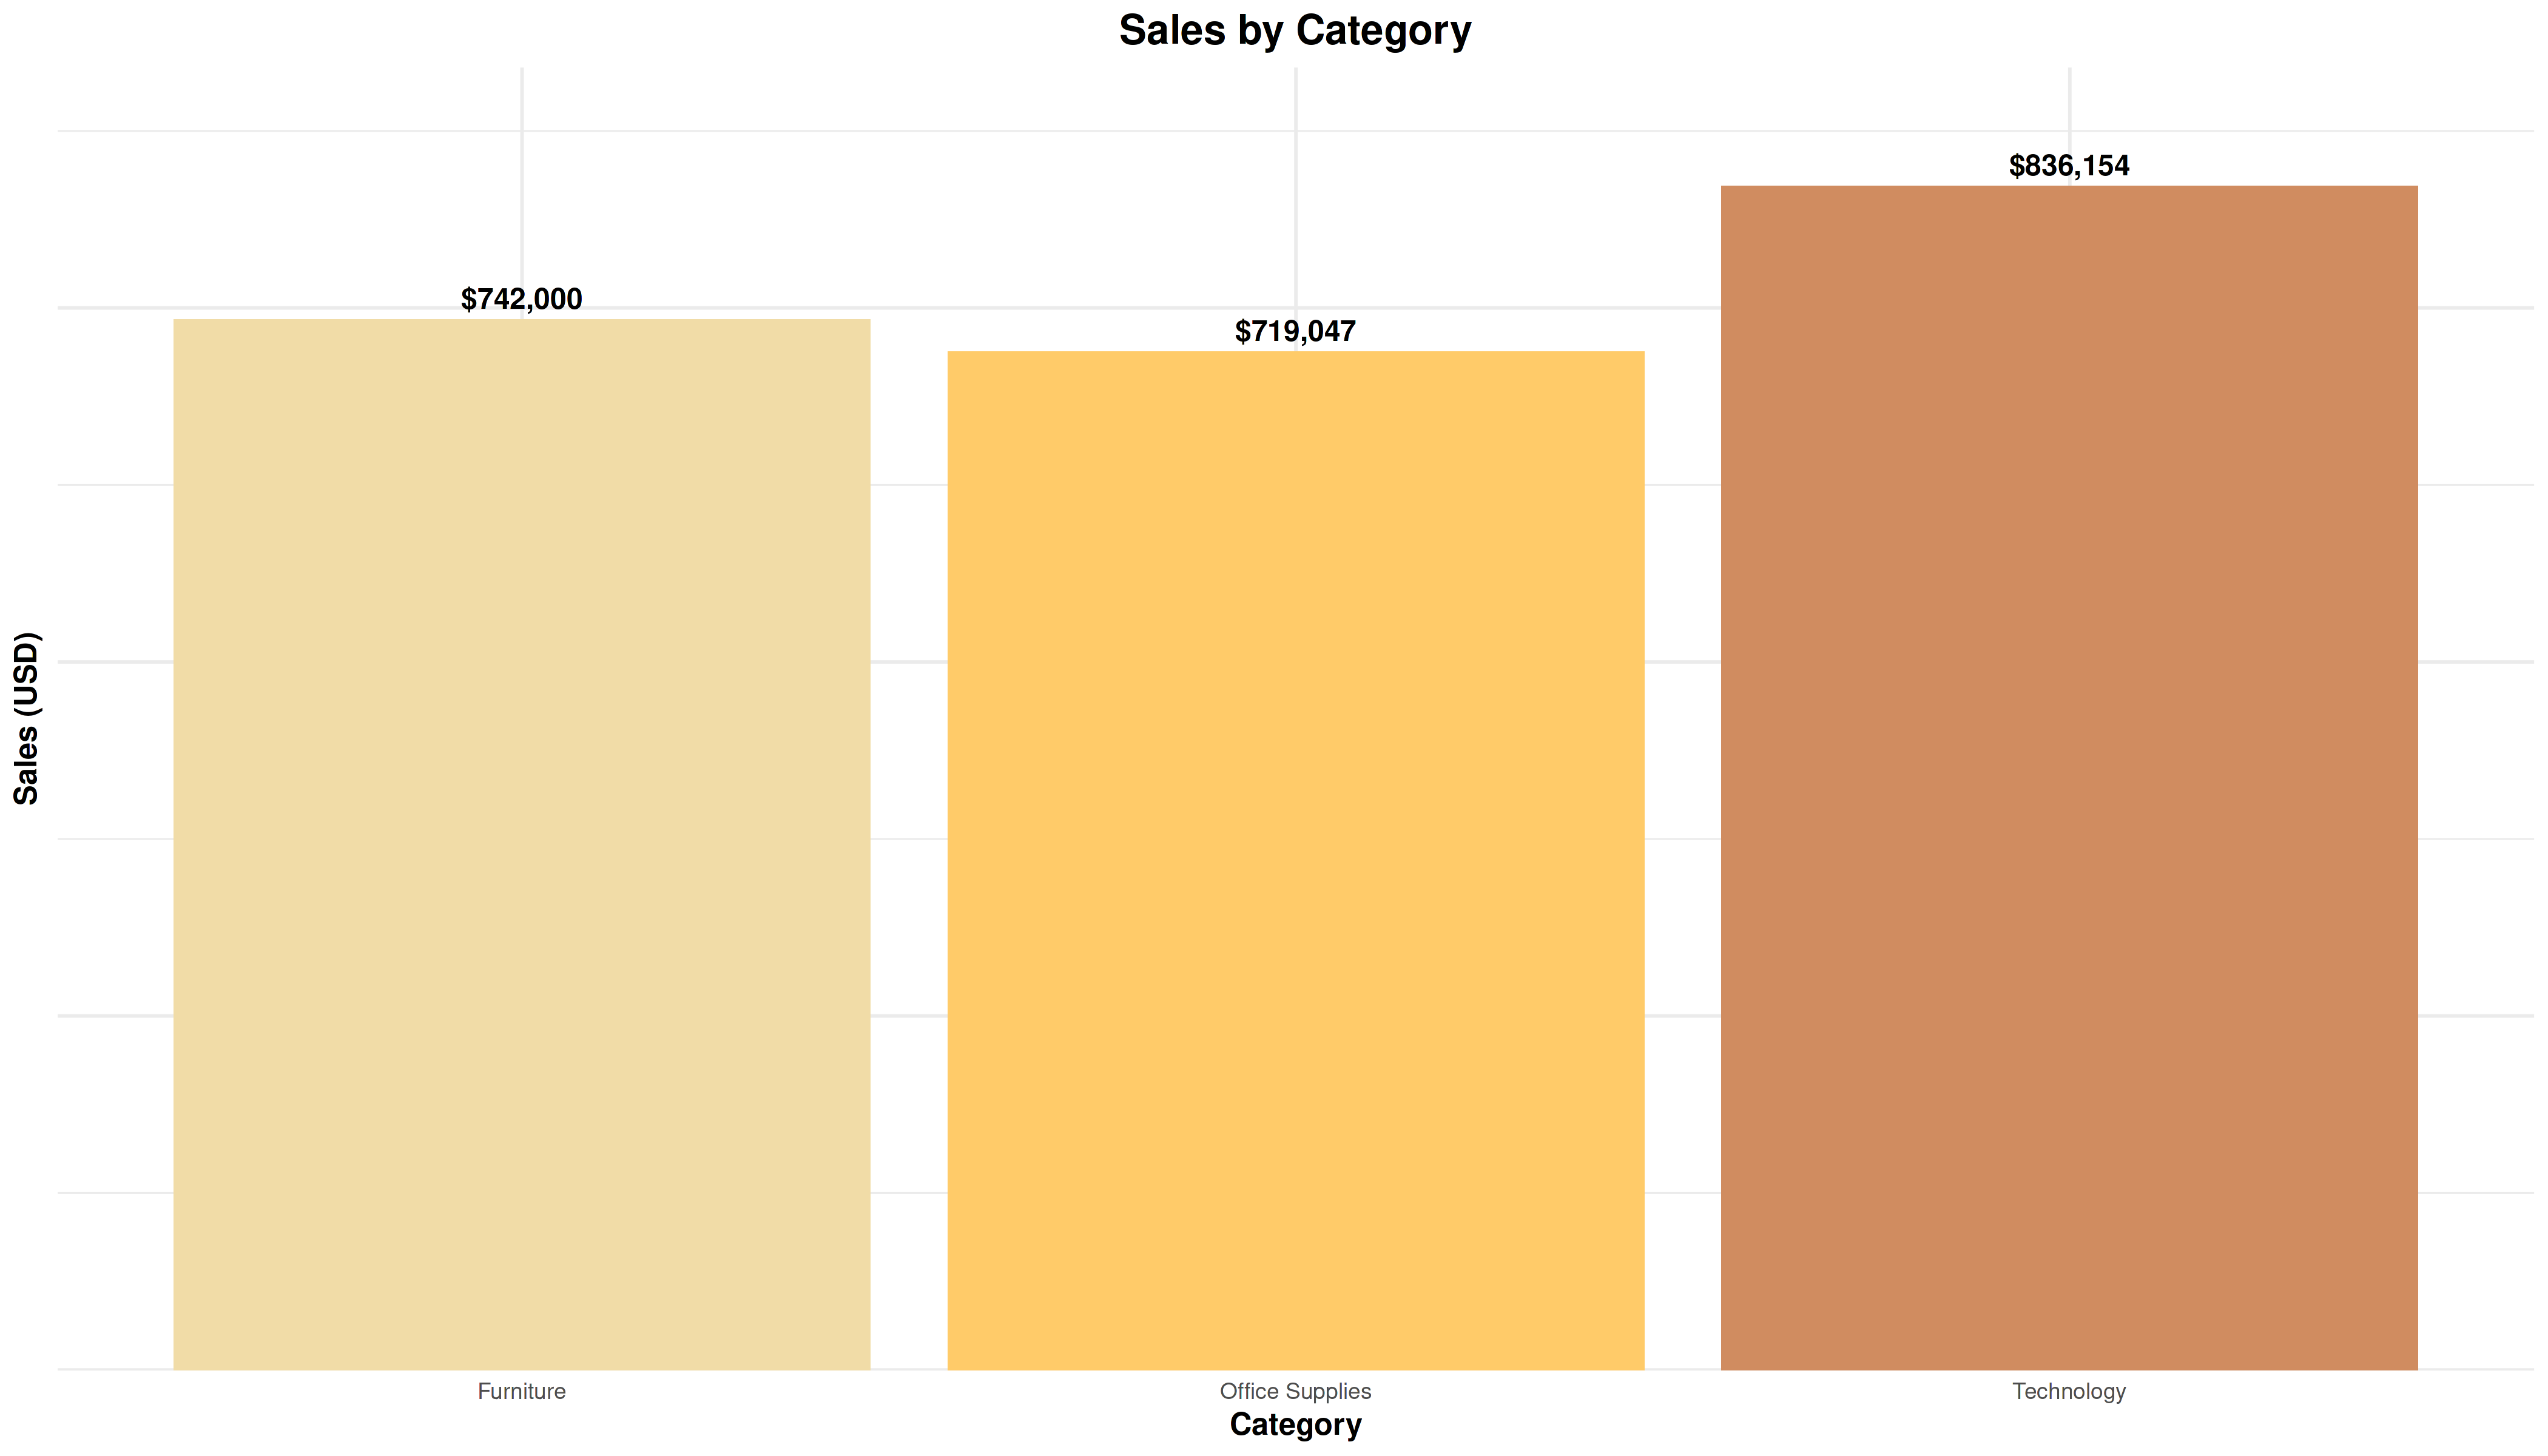

In [2]:
sales_by_category <- df %>%
  group_by(category) %>%
  summarise(sales = sum(sales)) %>%
  ungroup()

sales_by_category %>%
  ggplot(aes(x = category, y = sales, fill = category)) +
  geom_col() +
  geom_text(aes(label = dollar(sales)), vjust = -0.5, size = 4, fontface = "bold") +
  scale_fill_manual(values = c("#f1dca7", "#ffcb69", "#d08c60")) +
  scale_y_continuous(labels = dollar_format(), expand = expansion(mult = c(0, 0.1))) +
  labs(
    title = "Sales by Category",
    x = "Category",
    y = "Sales (USD)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = 'bold', hjust = 0.5, size = 16),
    axis.title = element_text(face = 'bold', size = 12),
    legend.position = "none",
    axis.text.y = element_blank()
  )

## 2.2 Sales vs Quantity by Category

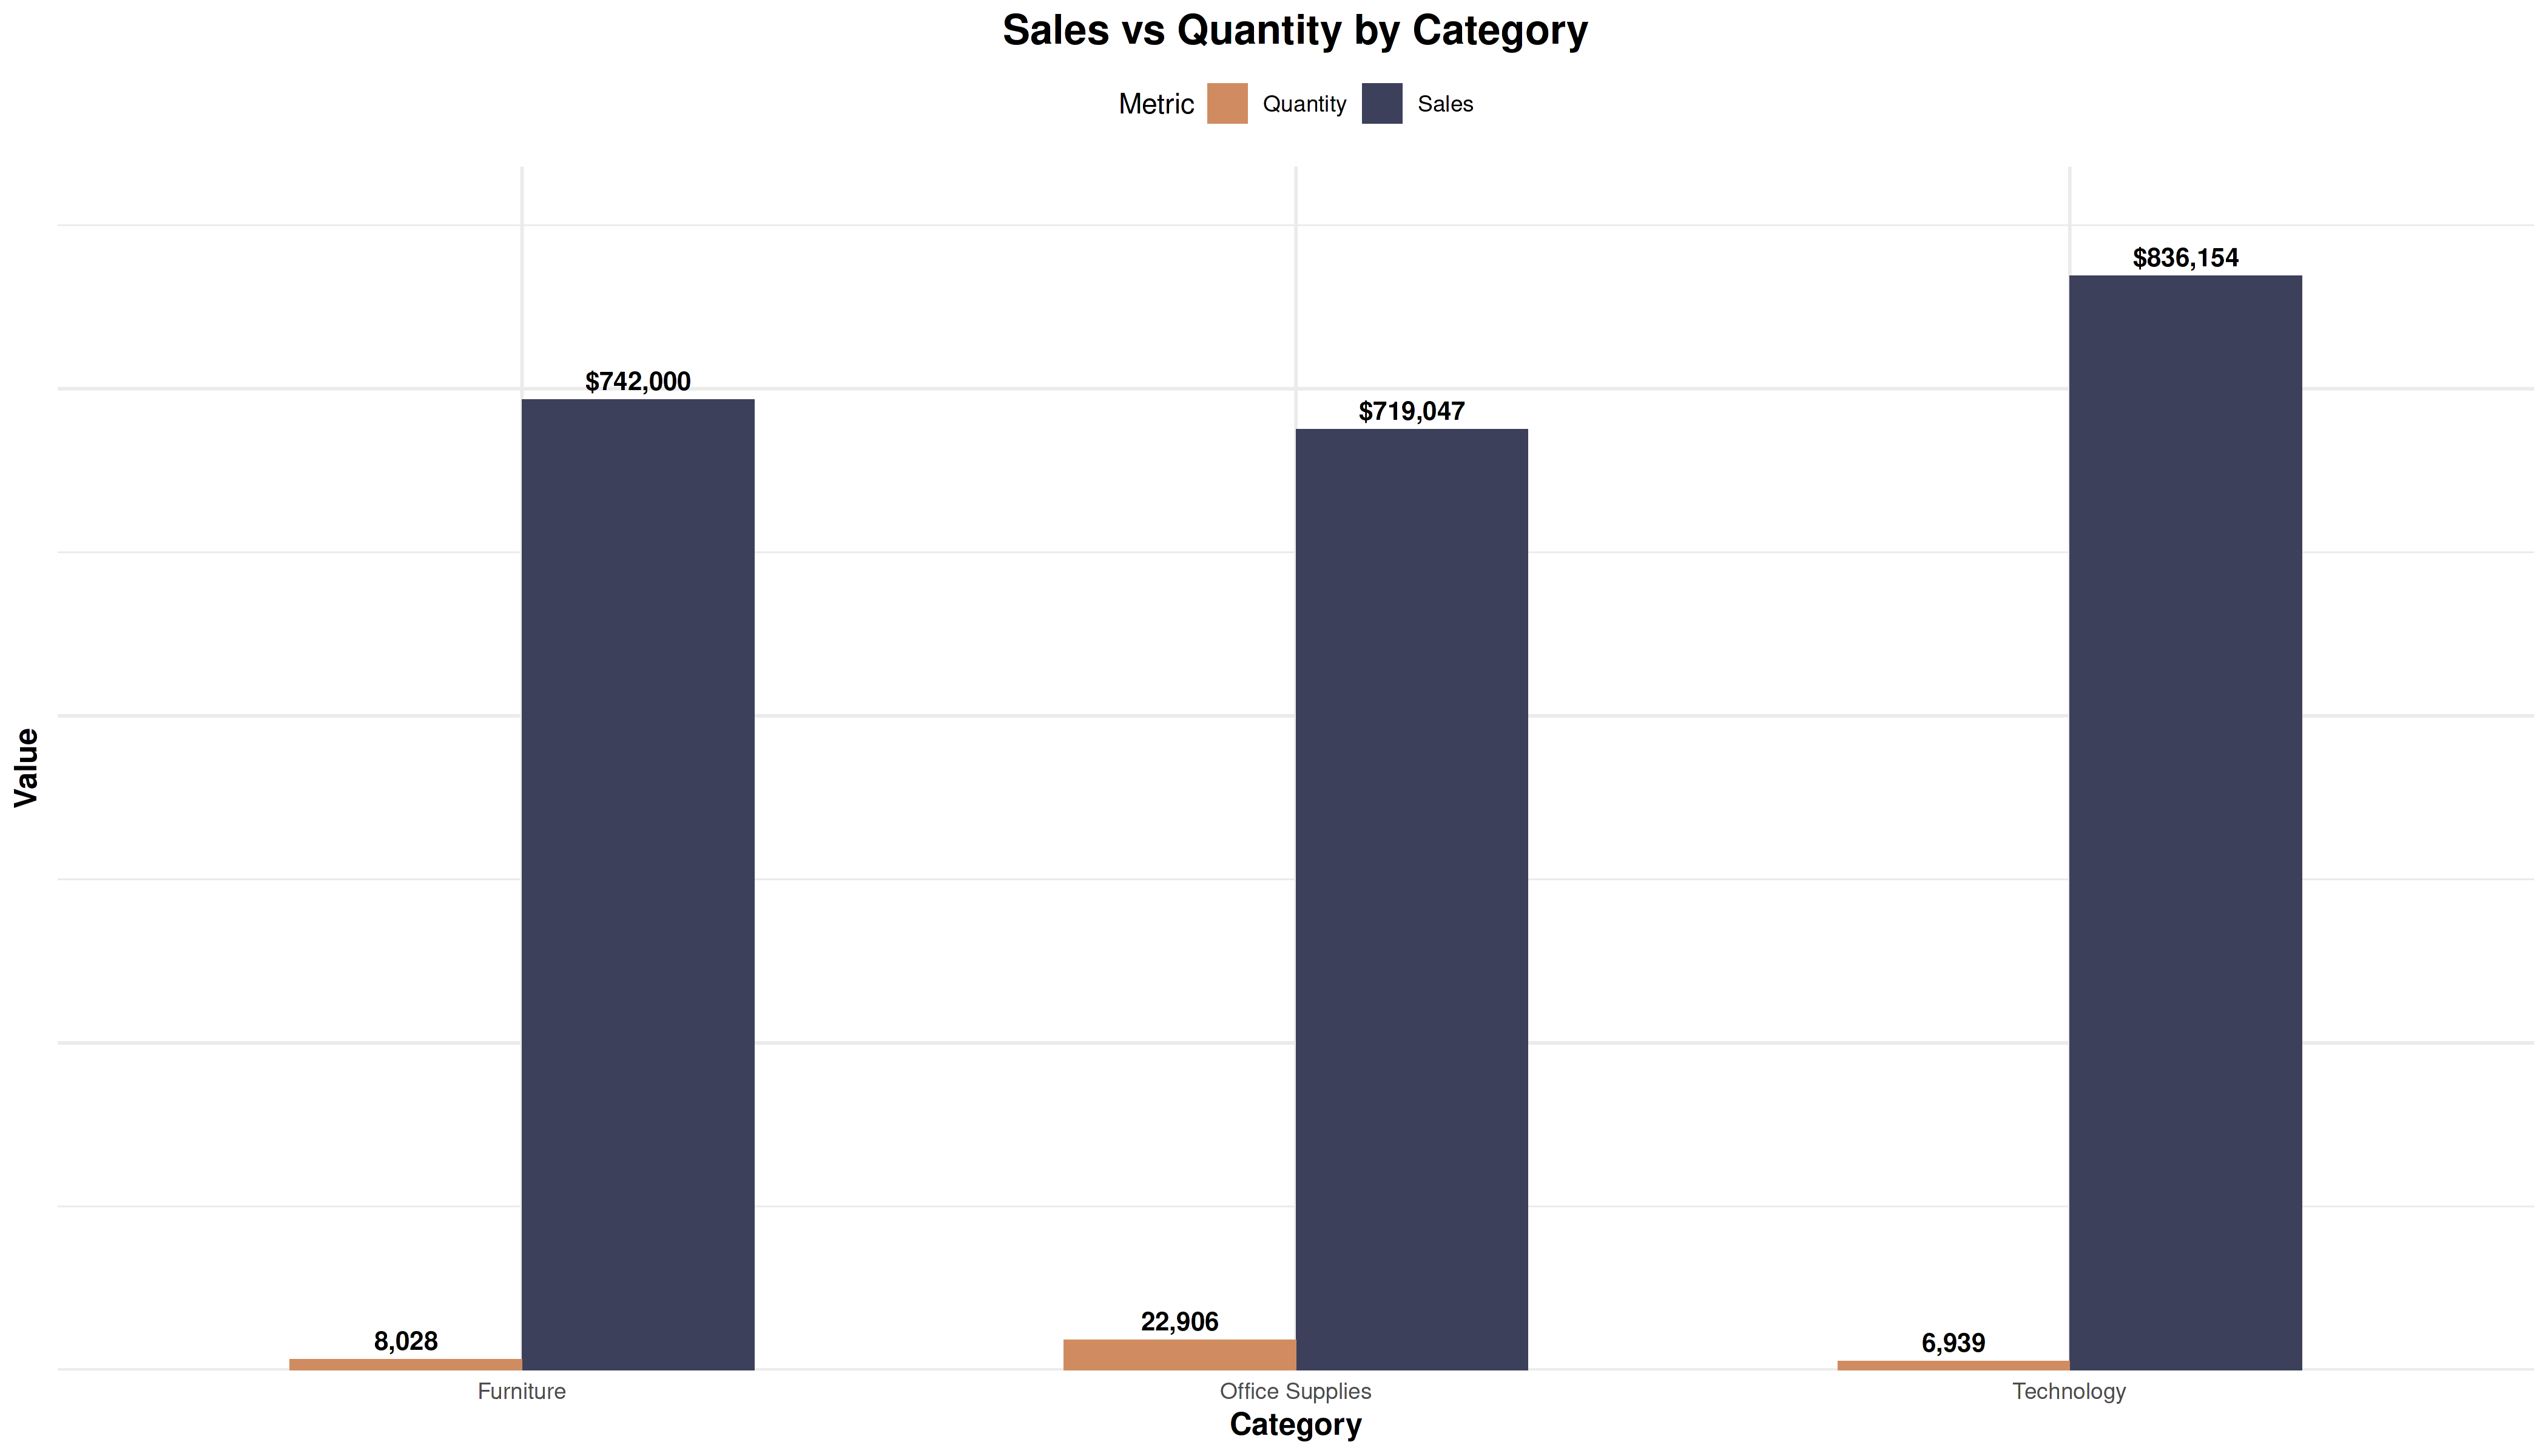

In [3]:
sales_quantity <- df %>%
  group_by(category) %>%
  summarise(sales = sum(sales), quantity = sum(quantity)) %>%
  pivot_longer(cols = c(sales, quantity), names_to = "metric", values_to = "value")

sales_quantity %>%
  ggplot(aes(x = category, y = value, fill = metric)) +
  geom_col(position = "dodge", width = 0.6) +
  geom_text(aes(label = ifelse(metric == "sales", dollar(value), comma(value))),
            position = position_dodge(width = 0.6), vjust = -0.5, size = 3.5, fontface = "bold") +
  scale_fill_manual(values = palette_color[c(3,6)], labels = c("Quantity", "Sales")) +
  scale_y_continuous(labels = comma_format(), expand = expansion(mult = c(0, 0.1))) +
  labs(
    title = "Sales vs Quantity by Category",
    x = "Category",
    y = "Value",
    fill = "Metric"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = 'bold', hjust = 0.5, size = 16),
    axis.title = element_text(face = 'bold', size = 12),
    legend.position = "top",
    axis.text.y = element_blank()
  )

# **3. GEOGRAPHIC ANALYSIS**

## 3.1 Top 10 Cities by Sales

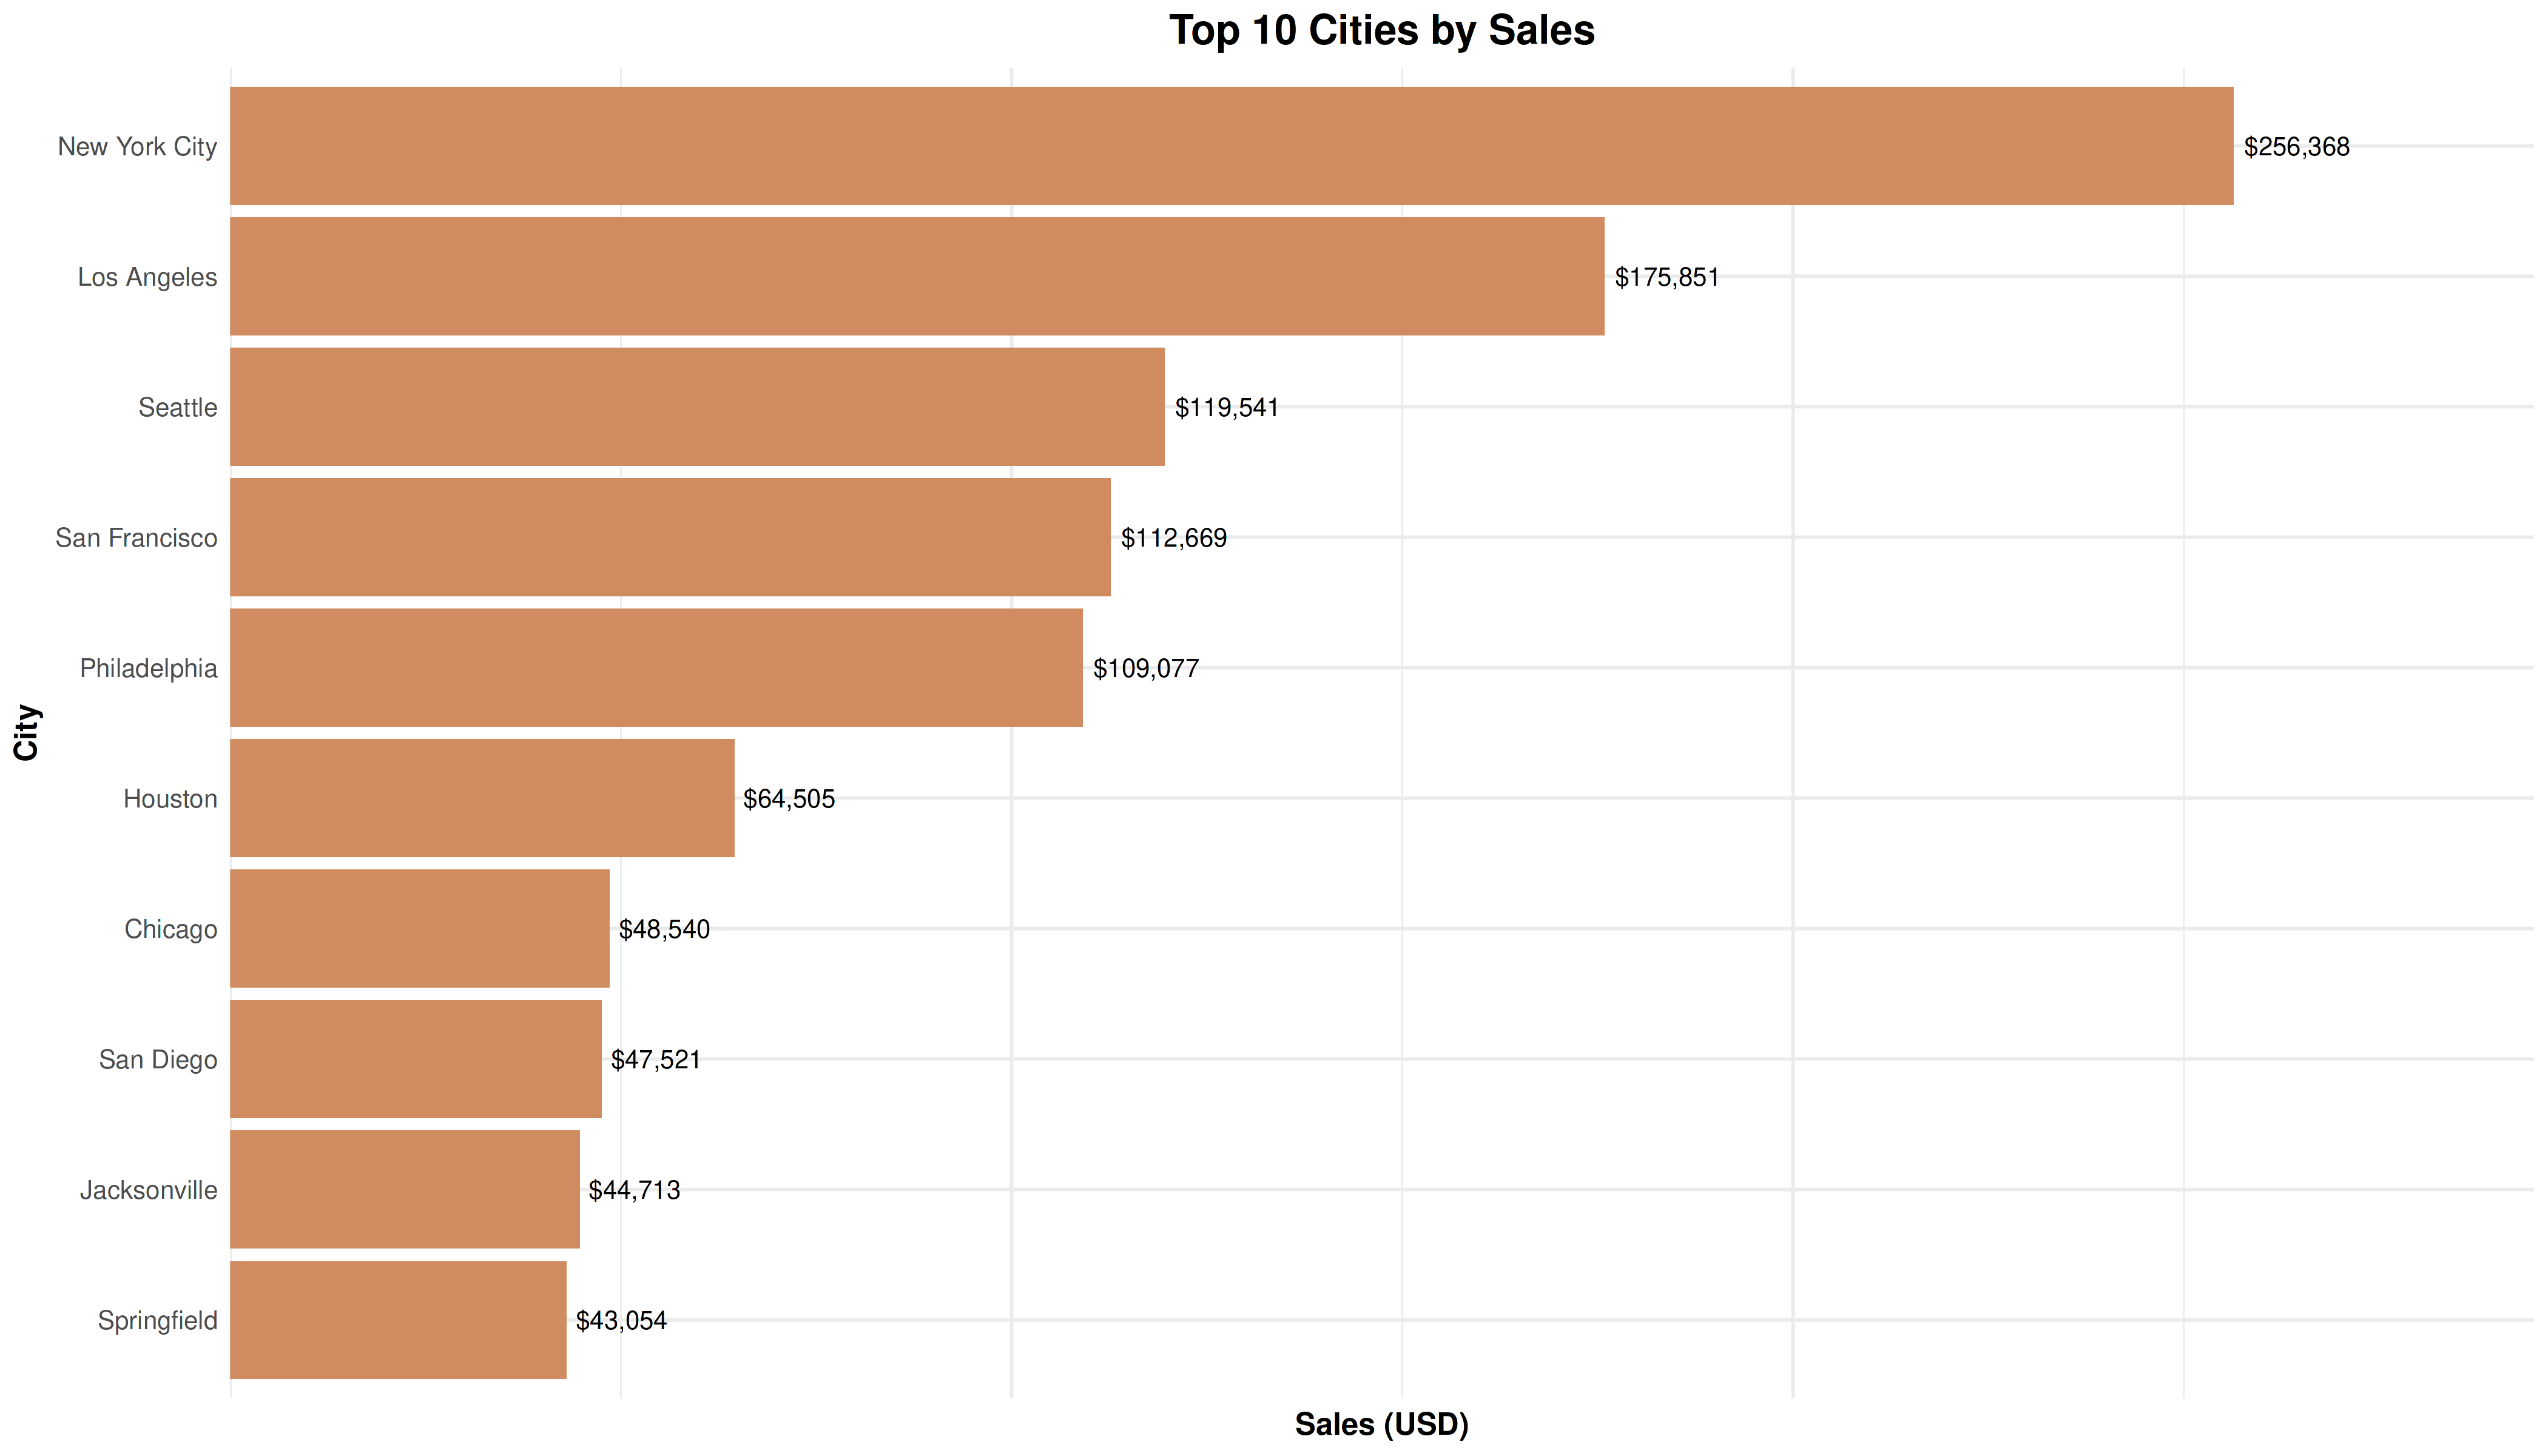

In [4]:
top_cities <- df %>%
  group_by(city) %>%
  summarise(sales = sum(sales)) %>%
  arrange(desc(sales)) %>%
  head(10) %>%
  mutate(city = fct_reorder(city, sales))

top_cities %>%
  ggplot(aes(x = city, y = sales)) +
  geom_col(fill = "#d08c60") +
  geom_text(aes(label = dollar(sales)), hjust = -0.1, size = 3.5) +
  coord_flip() +
  scale_y_continuous(labels = dollar_format(), expand = expansion(mult = c(0, 0.15))) +
  labs(
    title = "Top 10 Cities by Sales",
    x = 'City',
    y = 'Sales (USD)'
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = 'bold', hjust = 0.5, size = 16),
    axis.title = element_text(face = 'bold', size = 12),
    axis.text.y = element_text(size = 10),
    axis.text.x = element_blank()
  )

## 3.2 Sales by Region

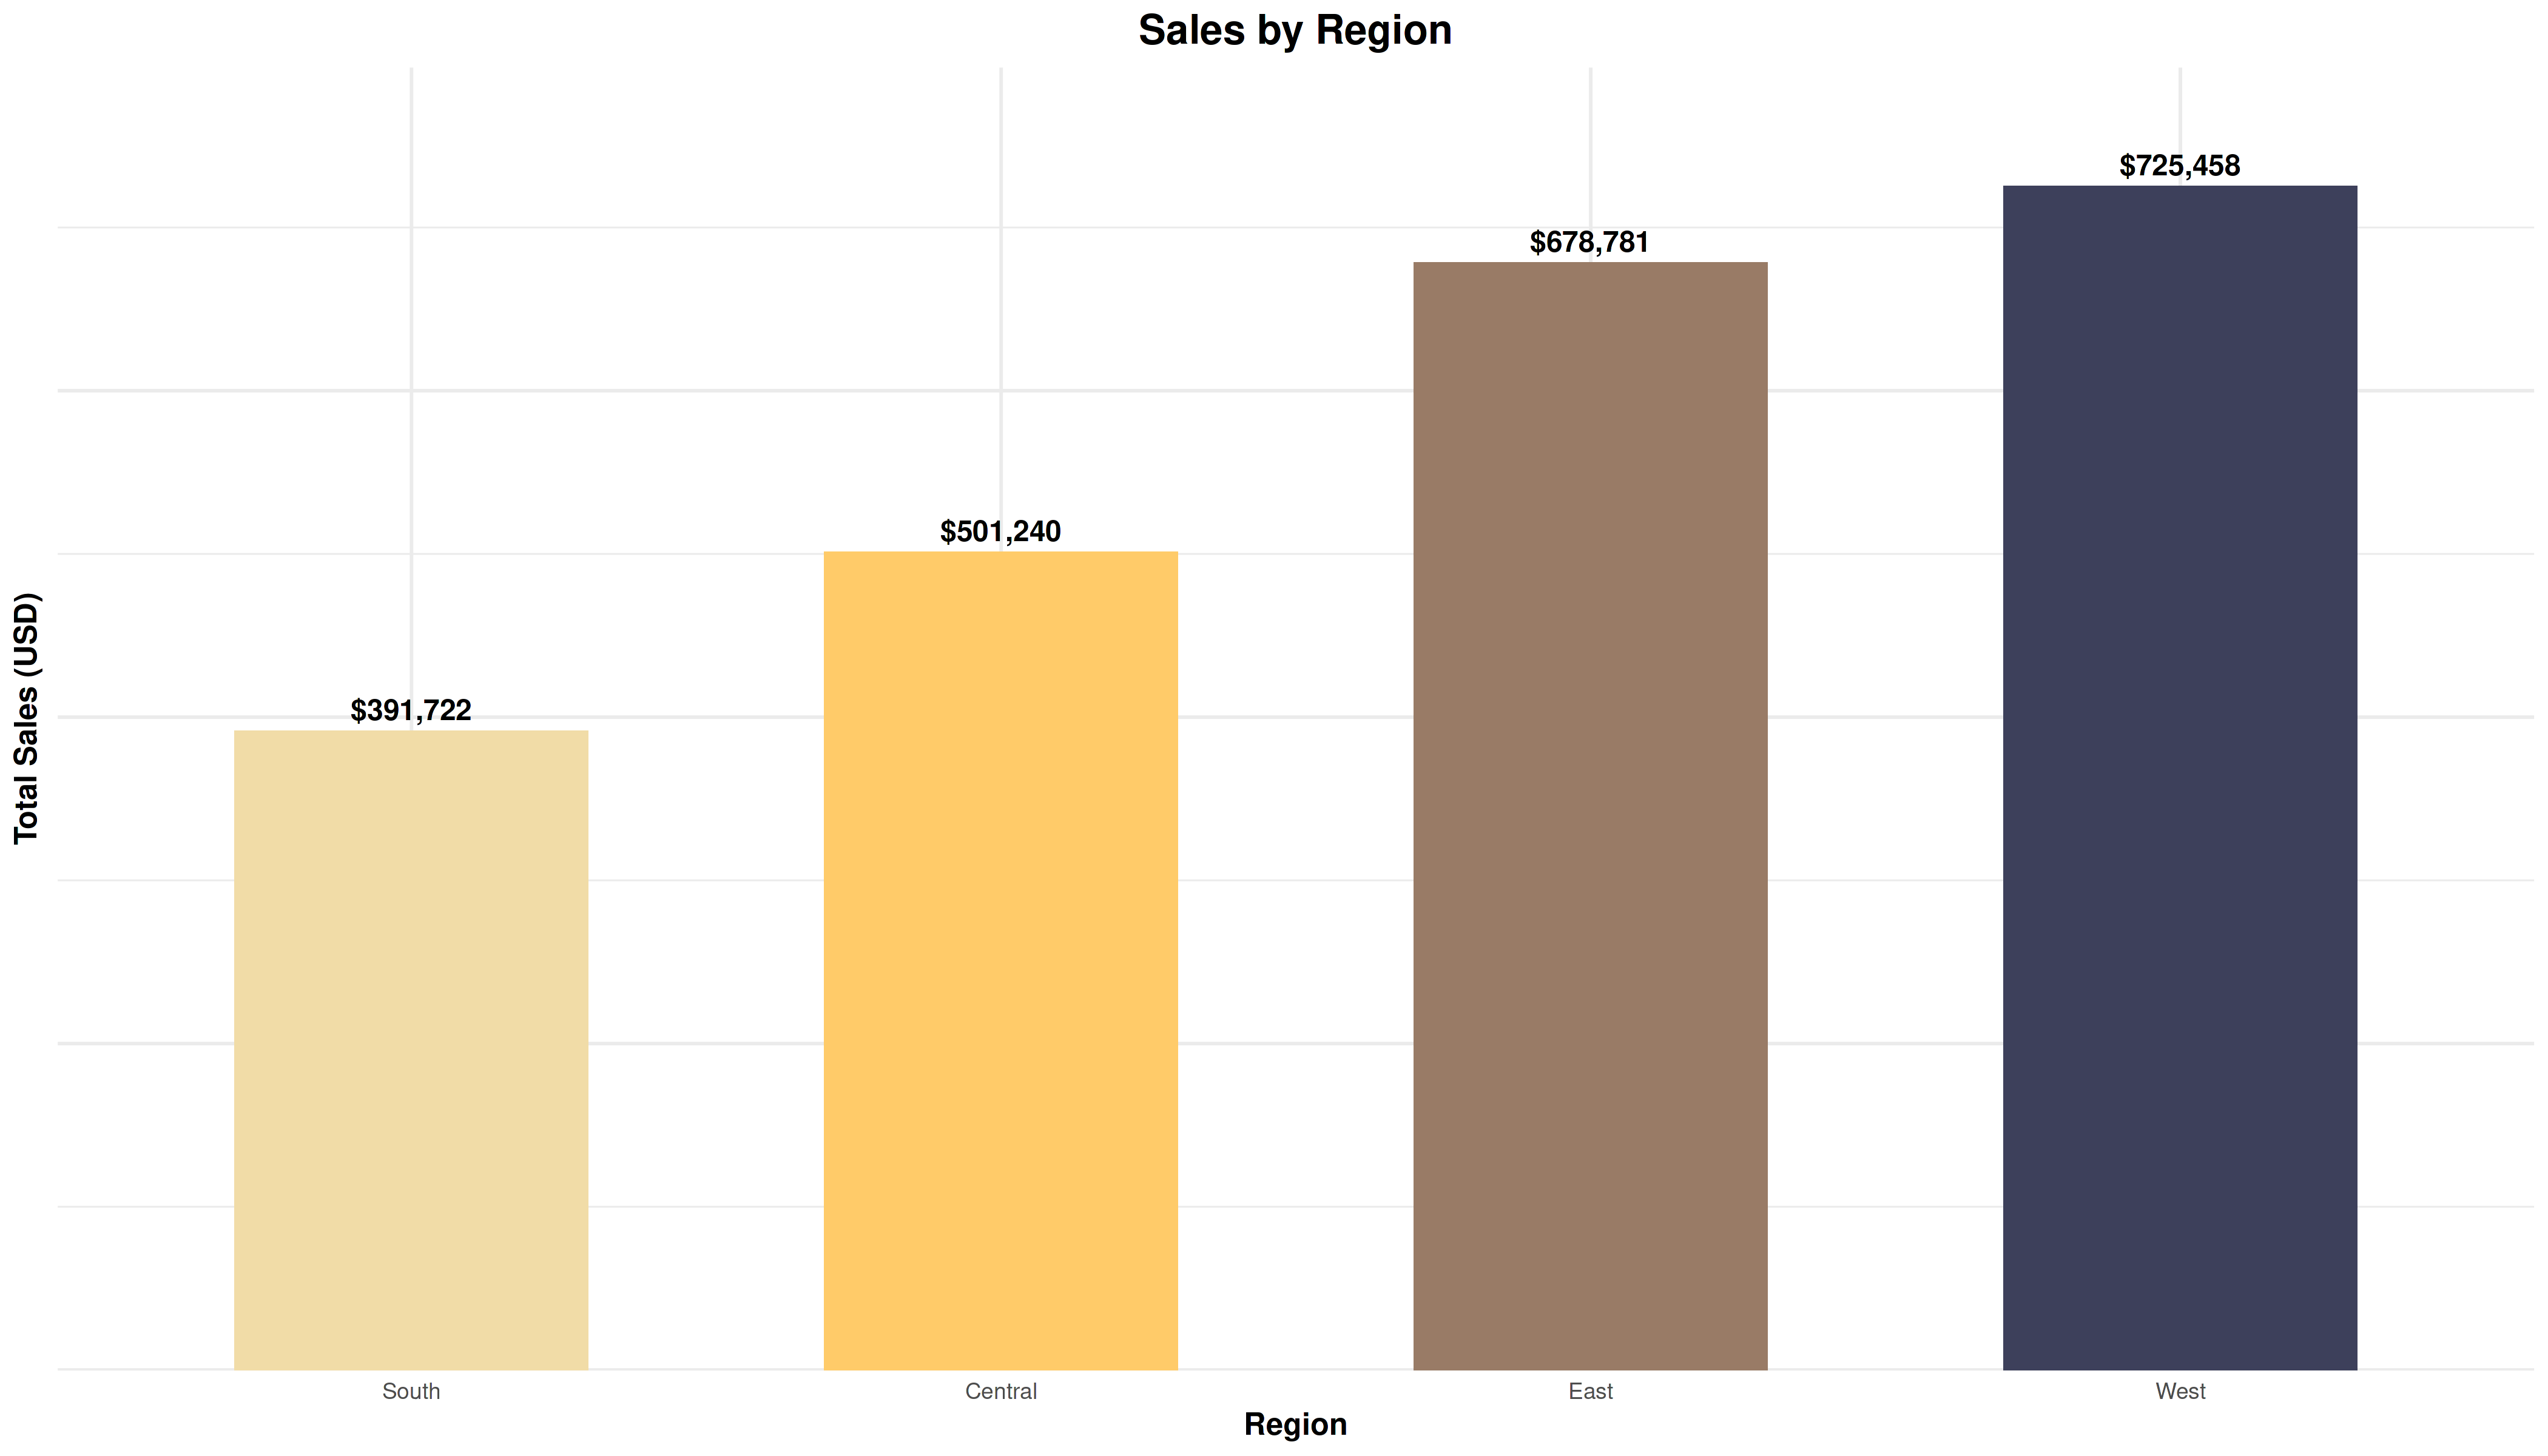

In [5]:
region_sales <- df %>%
  group_by(region) %>%
  summarise(sales = sum(sales)) %>%
  mutate(region = fct_reorder(region, sales))

region_sales %>%
  ggplot(aes(x = region, y = sales, fill = region)) +
  geom_col(width = 0.6) +
  geom_text(aes(label = dollar(sales)), vjust = -0.5, size = 4, fontface = "bold") +
  scale_fill_manual(values = palette_color[c(1,2,4,6)]) +
  scale_y_continuous(labels = dollar_format(), expand = expansion(mult = c(0, 0.1))) +
  labs(
    title = "Sales by Region",
    x = "Region",
    y = "Total Sales (USD)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = 'bold', hjust = 0.5, size = 16),
    axis.title = element_text(face = 'bold', size = 12),
    legend.position = "none",
    axis.text.y = element_blank()
  )

## 3.3 Profit/Loss by State (Top 15)

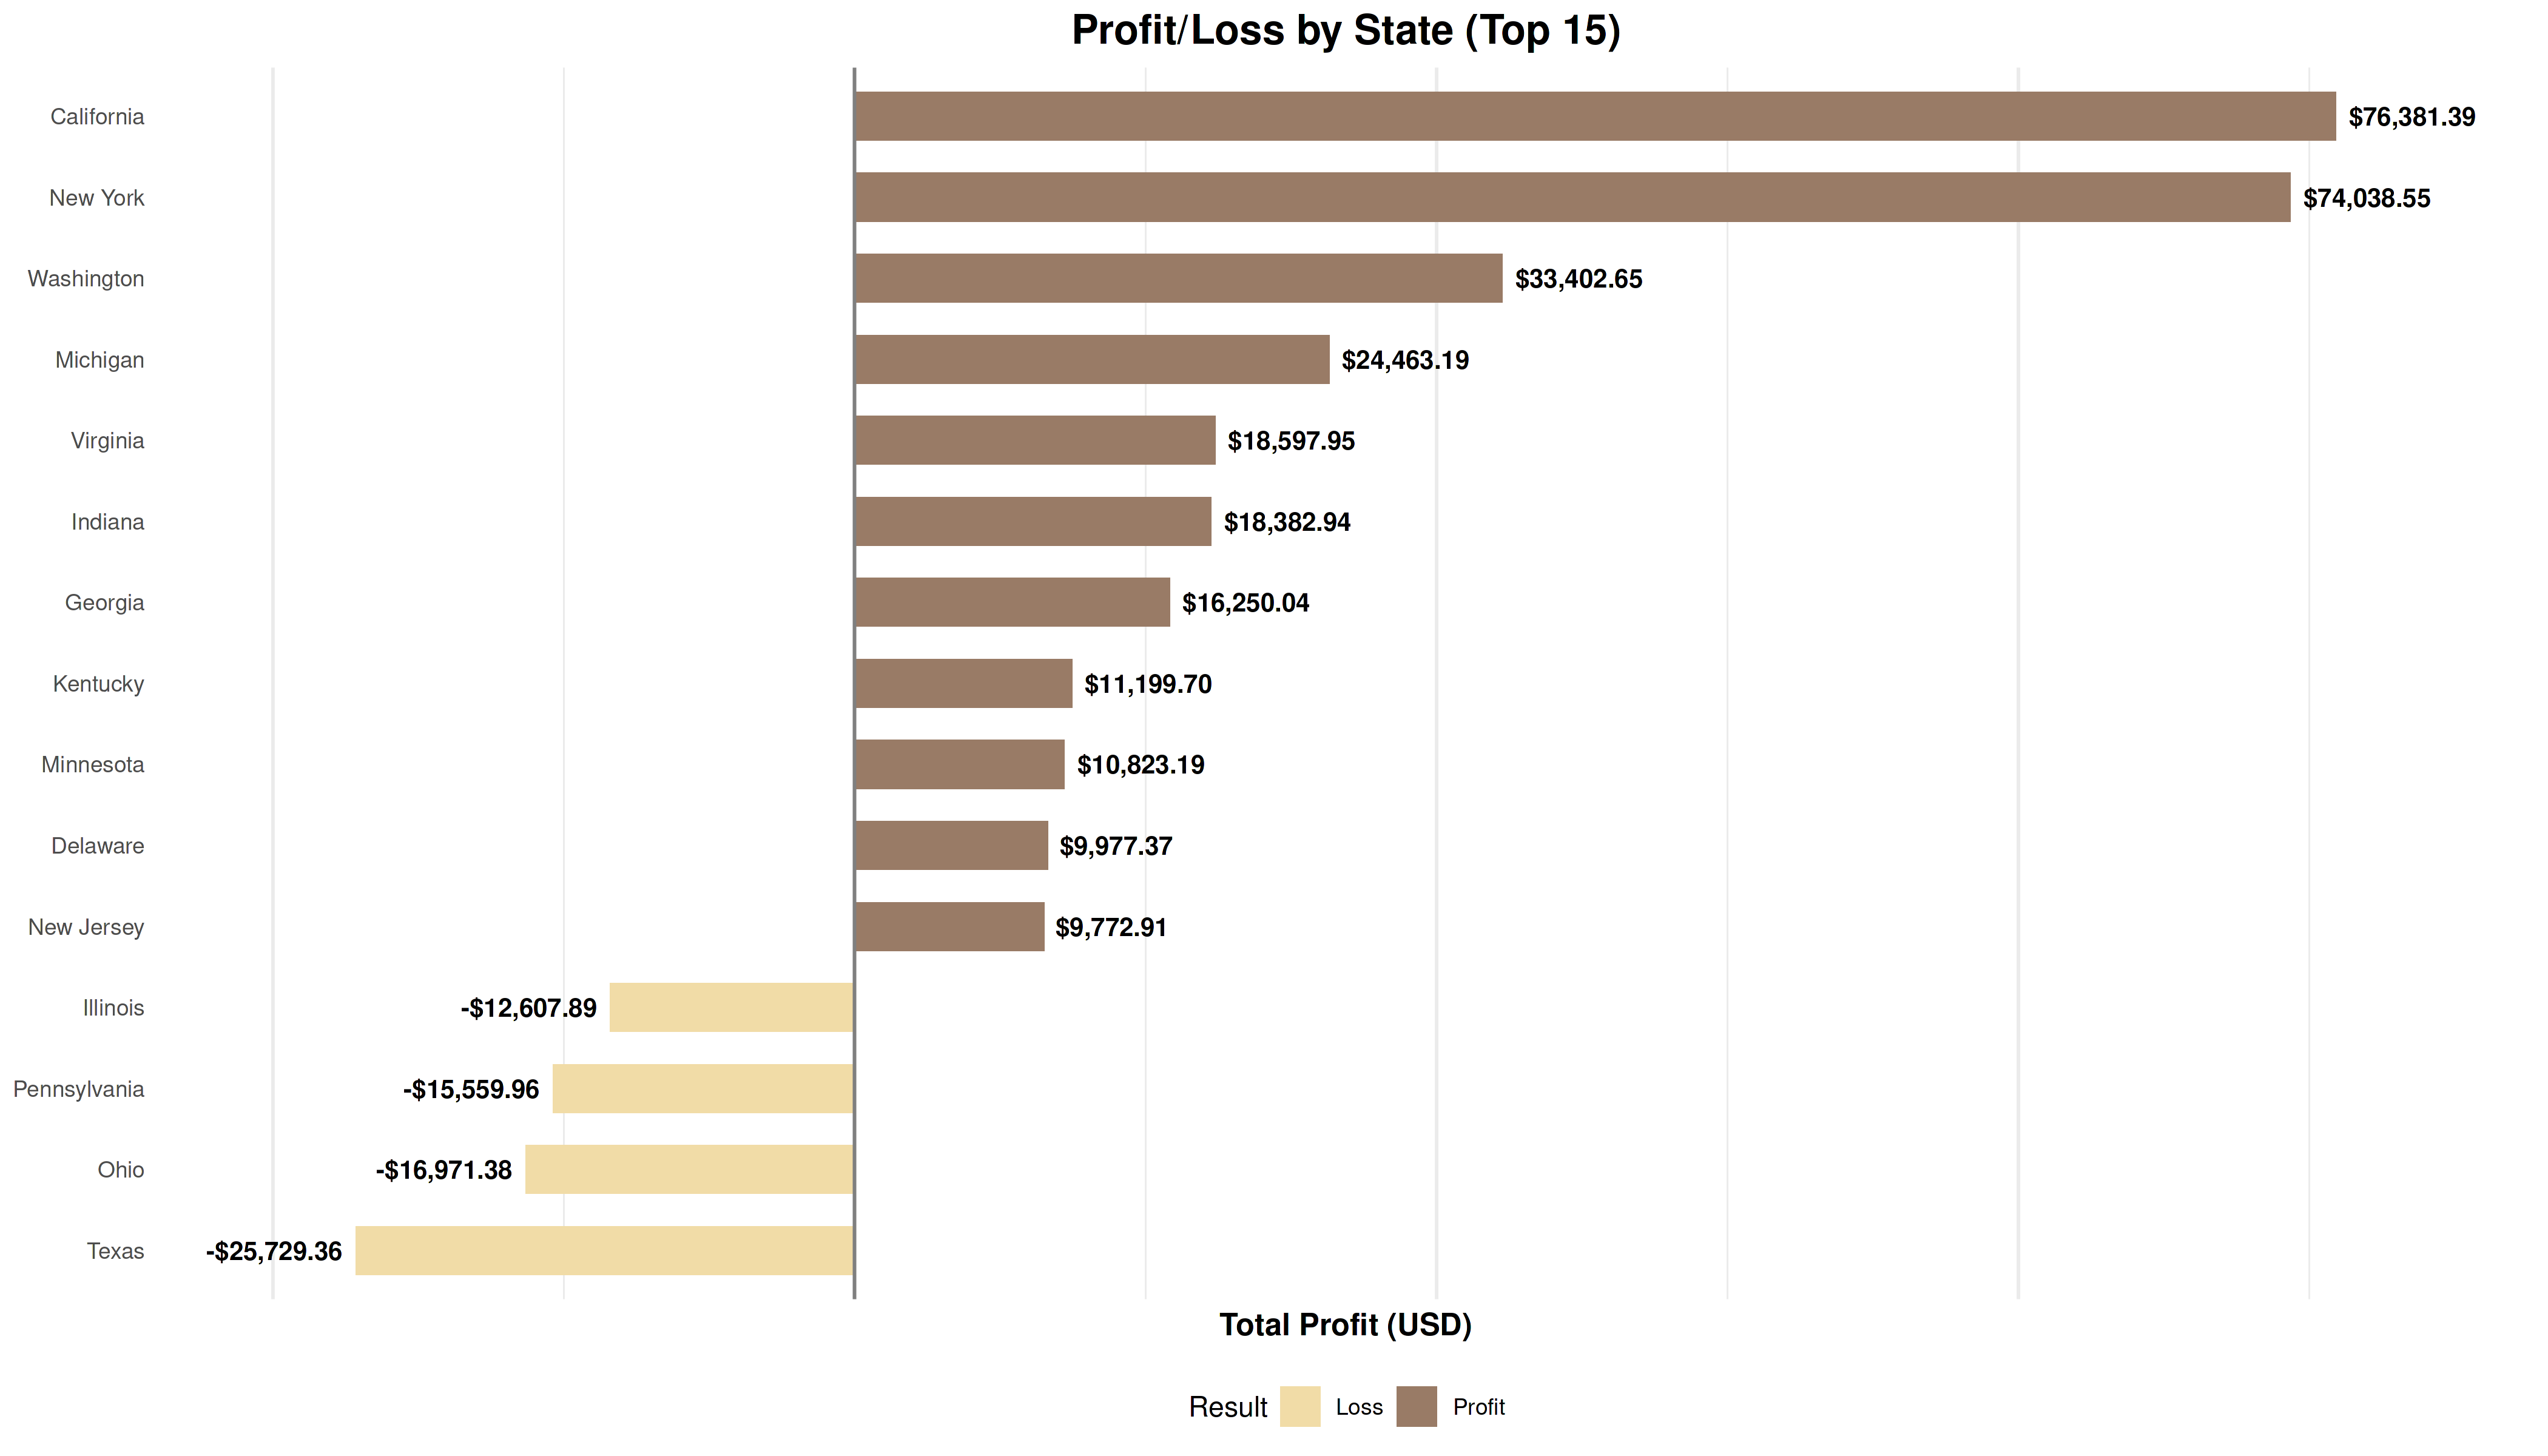

In [6]:
## 3.3 Profit/Loss by State (Top 15)
state_profit <- df %>%
  group_by(state) %>%
  summarise(profit = sum(profit)) %>%
  arrange(desc(abs(profit))) %>%
  head(15) %>%
  mutate(state = fct_reorder(state, profit),
         type = ifelse(profit >= 0, "Profit", "Loss"))

state_profit %>%
  ggplot(aes(x = state, y = profit, fill = type)) +
  geom_col(width = 0.6) +
  geom_hline(yintercept = 0, color = "gray50") +
  geom_text(aes(label = dollar(profit), hjust = ifelse(profit >= 0, -0.1, 1.1)),
            size = 3.5, fontface = "bold") +
  coord_flip() +
  scale_fill_manual(values = c("Loss" = palette_color[1], "Profit" = palette_color[4])) +
  scale_y_continuous(labels = dollar_format(), expand = expansion(mult = c(0.1, 0.1))) +
  labs(
    title = "Profit/Loss by State (Top 15)",
    x = NULL,
    y = "Total Profit (USD)",
    fill = "Result"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = 'bold', hjust = 0.5, size = 16),
    axis.title = element_text(face = 'bold', size = 12),
    legend.position = "bottom",
    panel.grid.major.y = element_blank(),
    axis.text.x = element_blank()
  )


# 4. SHIPPING ANALYSIS

## 4.1 Shipping Methods Distribution

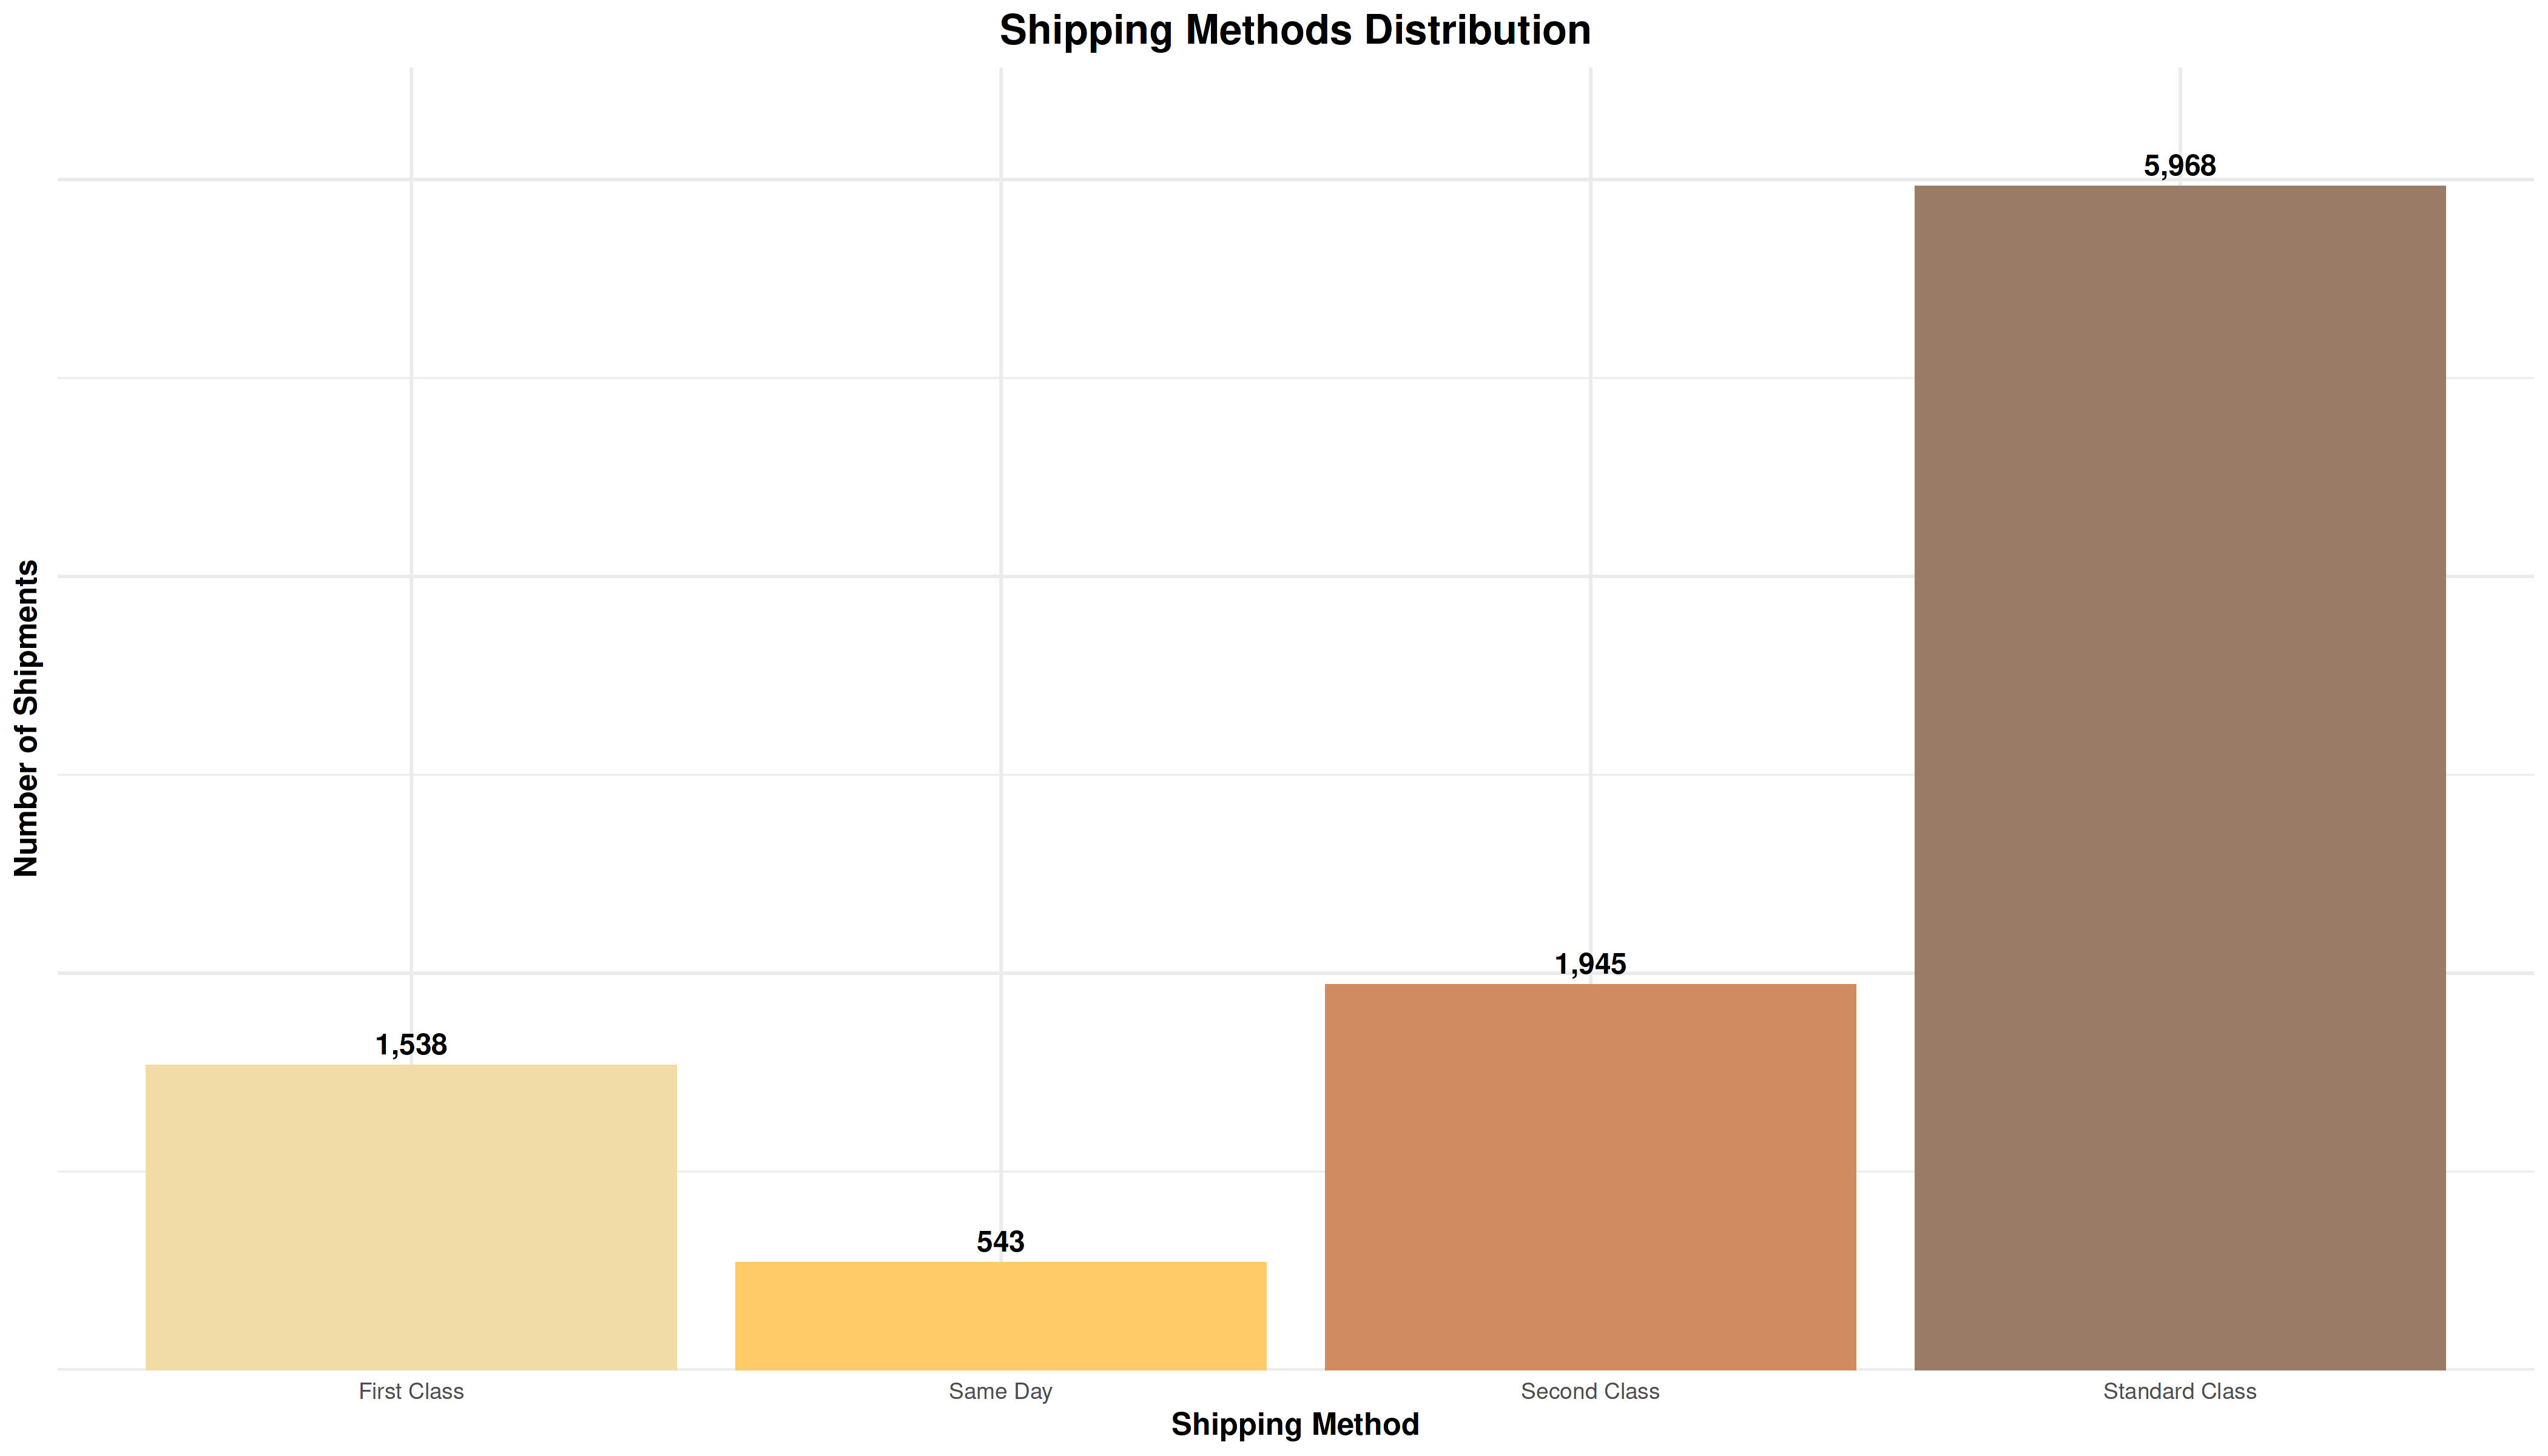

In [7]:
# 4.1 Shipping Methods Distribution
shipping_distribution <- df %>%
  count(ship_mode, name = 'count')

shipping_distribution %>%
  ggplot(aes(x = ship_mode, y = count, fill = ship_mode)) +
  geom_col() +
  geom_text(aes(label = comma(count)), vjust = -0.5, size = 4, fontface = "bold") +
  scale_fill_manual(values = palette_color[1:4]) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
  labs(
    title = "Shipping Methods Distribution",
    x = "Shipping Method",
    y = "Number of Shipments"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = 'bold', hjust = 0.5, size = 16),
    axis.title = element_text(face = 'bold', size = 12),
    legend.position = "none",
    axis.text.y = element_blank()
  )


# 5. PROFITABILITY ANALYSIS

## 5.1 Sales vs Profit Relationship

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


`geom_smooth()` using formula = 'y ~ x'


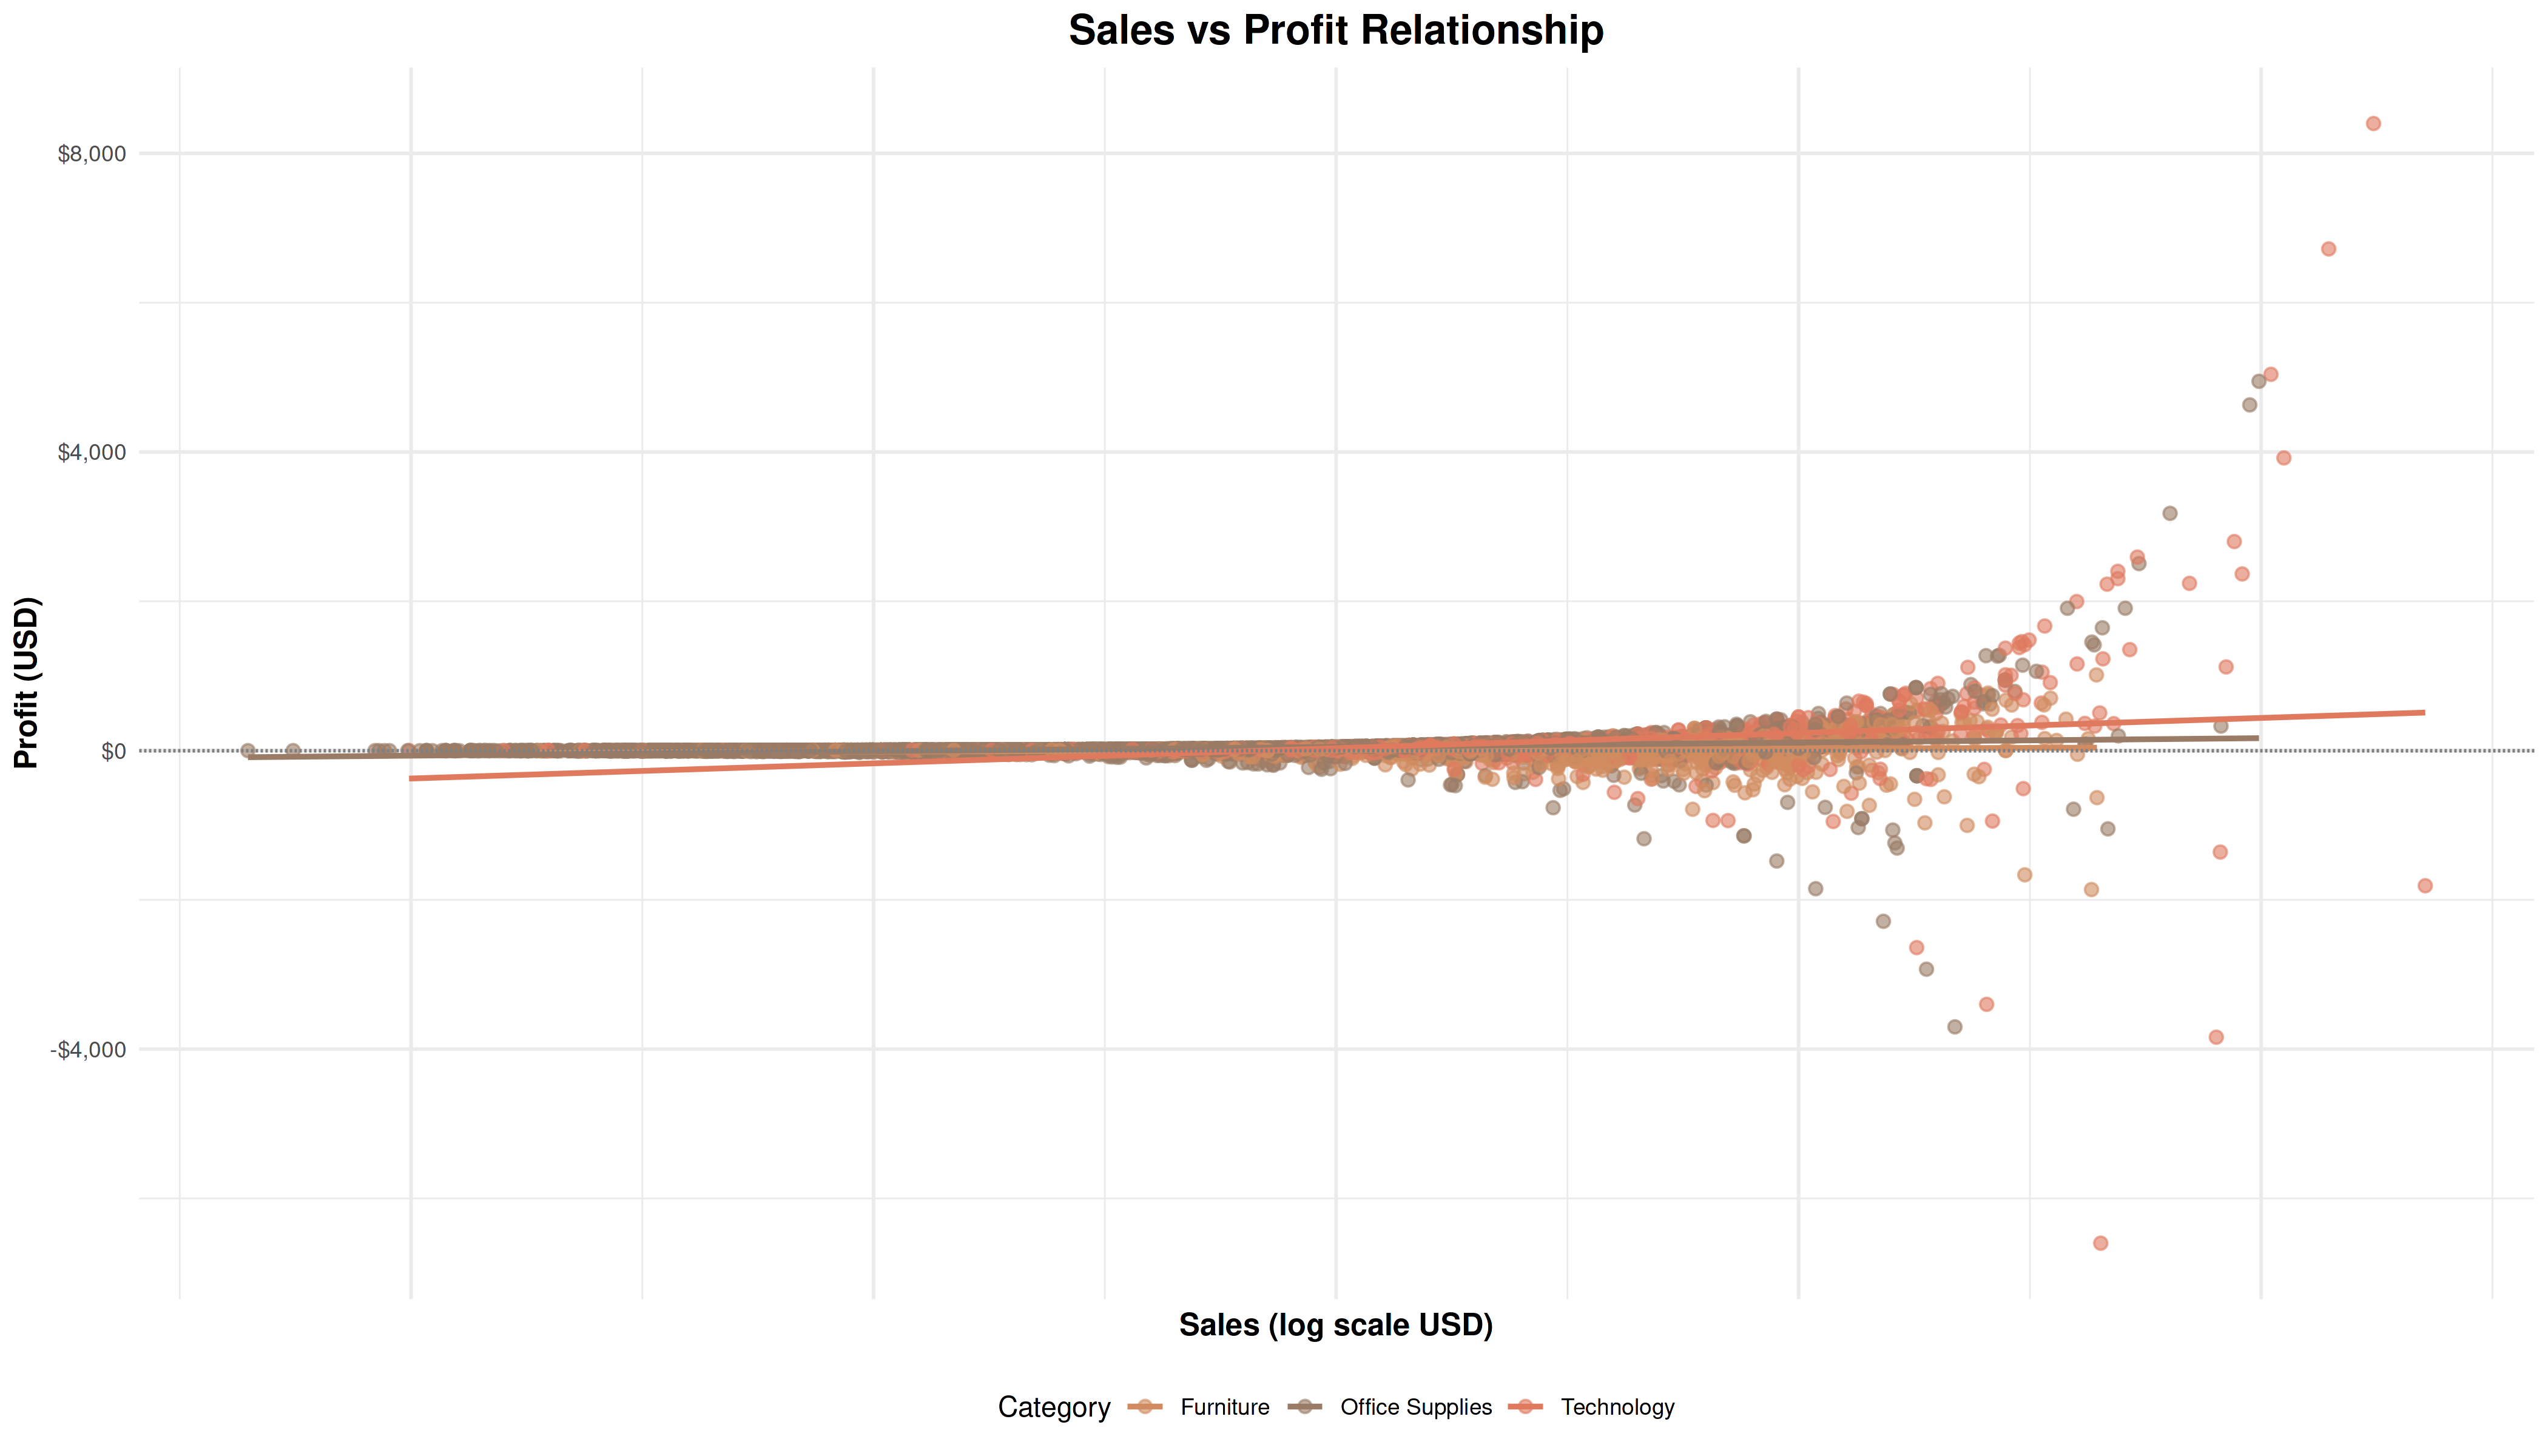

In [8]:
profit_margin <- df %>%
  mutate(margin = profit/sales) %>%
  filter(abs(margin) < 5)

profit_margin %>%
  ggplot(aes(x = sales, y = profit, color = category)) +
  geom_point(alpha = 0.6, size = 2) +
  geom_smooth(method = "lm", se = FALSE, size = 0.8) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  scale_color_manual(values = palette_color[c(3,4,5)]) +
  scale_x_log10(labels = dollar_format()) +
  scale_y_continuous(labels = dollar_format()) +
  labs(
    title = "Sales vs Profit Relationship",
    x = "Sales (log scale USD)",
    y = "Profit (USD)",
    color = "Category"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = 'bold', hjust = 0.5, size = 16),
    axis.title = element_text(face = 'bold', size = 12),
    legend.position = "bottom",
    axis.text.x = element_blank()
  )
